In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [42]:
data = pd.read_csv('../data/retail_store_data_with_real_items.csv')
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


In [43]:
# Total unique items
total_unique_items = data['Item Name'].nunique()
print('Total unique items:', total_unique_items)

Total unique items: 99


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         109600 non-null  object 
 1   Day          109600 non-null  object 
 2   Item Name    109600 non-null  object 
 3   Price        109600 non-null  float64
 4   In Stock     109600 non-null  bool   
 5   Total Stock  109600 non-null  int64  
 6   Sales        109600 non-null  int64  
 7   Stock Left   109600 non-null  int64  
 8   Revenue      109600 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 6.8+ MB


In [45]:
data['Item Name'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
109595    False
109596    False
109597    False
109598    False
109599    False
Name: Item Name, Length: 109600, dtype: bool

In [46]:
data['Date'] = pd.to_datetime(data['Date'])

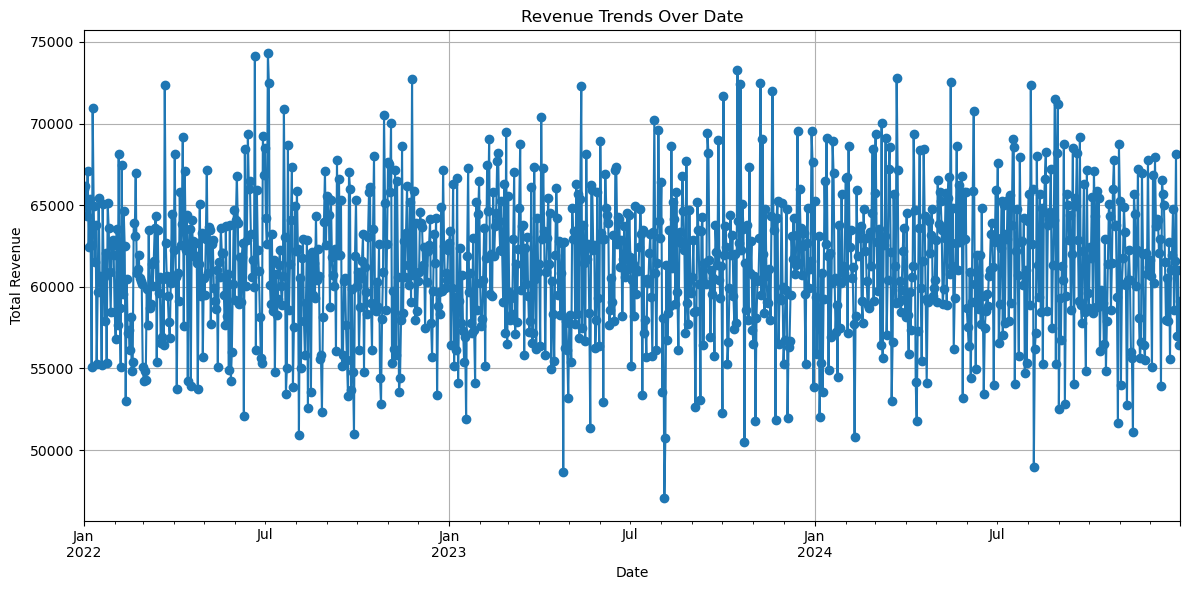

In [47]:
plt.figure(figsize=(12, 6))
data.groupby('Date')['Revenue'].sum().plot(kind='line', marker='o')
plt.title('Revenue Trends Over Date')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
data.isnull().sum()

Date           0
Day            0
Item Name      0
Price          0
In Stock       0
Total Stock    0
Sales          0
Stock Left     0
Revenue        0
dtype: int64

In [49]:
# Check for duplication
data.duplicated().sum()

0

In [50]:
def EDA(data):
    print("----------Structure of the Data--------- \n")
    print("Shape of the datasets:", data.shape)
    print("\n Column Names:", data.columns)
    print("\n First 5 rows: \n", data.head())
    print("\n Data Info:\n")
    data.info()
    print("\n----------End Structure of the Data--------- \n")
    print("\n----------Summary, Missing Value, Data types --------- \n")
    print("\nSummary Statistics:\n", data.describe())
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nData Types:\n", data.dtypes)
    print("\n----------End Summary, Missing Value, Data types --------- \n")

In [51]:
EDA(data)

----------Structure of the Data--------- 

Shape of the datasets: (109600, 9)

 Column Names: Index(['Date', 'Day', 'Item Name', 'Price', 'In Stock', 'Total Stock', 'Sales',
       'Stock Left', 'Revenue'],
      dtype='object')

 First 5 rows: 
         Date       Day            Item Name  Price  In Stock  Total Stock  \
0 2022-01-01  Saturday                  Tea  11.65      True           64   
1 2022-01-01  Saturday        Shaving Cream  36.52      True           78   
2 2022-01-01  Saturday  All-Purpose Cleaner  13.58      True          109   
3 2022-01-01  Saturday                 Rice   6.30      True          187   
4 2022-01-01  Saturday              Perfume  43.33      True          137   

   Sales  Stock Left  Revenue  
0     19          45   221.35  
1     23          55   839.96  
2     28          81   380.24  
3     14         173    88.20  
4      0         137     0.00  

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data c

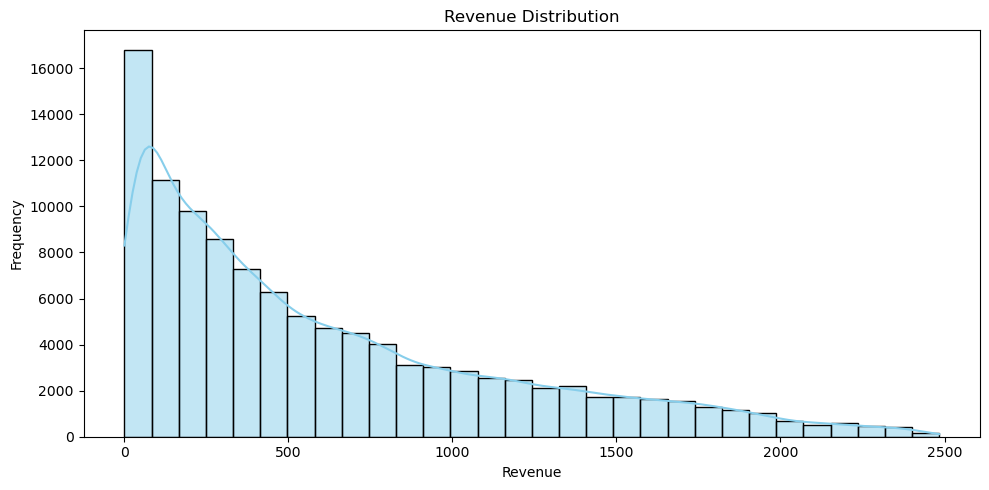

In [52]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Revenue'], bins=30, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

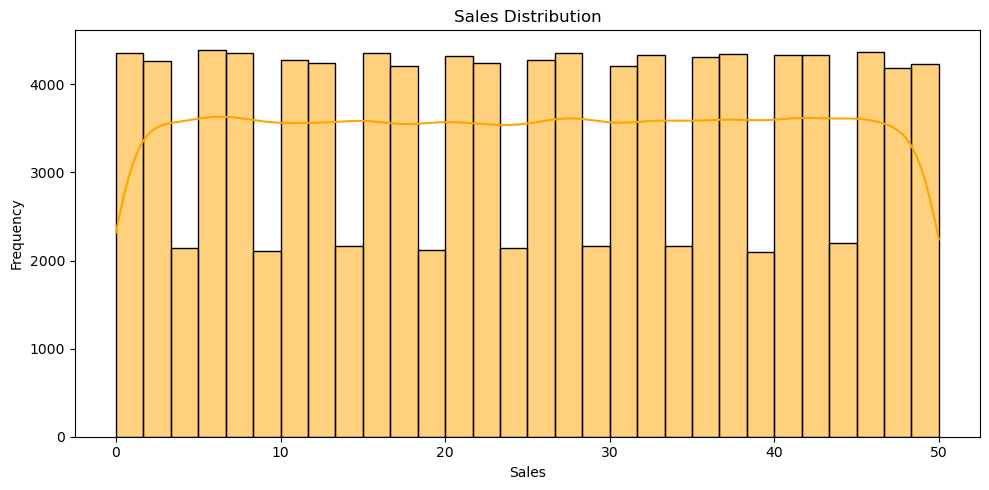

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Sales'], bins=30, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

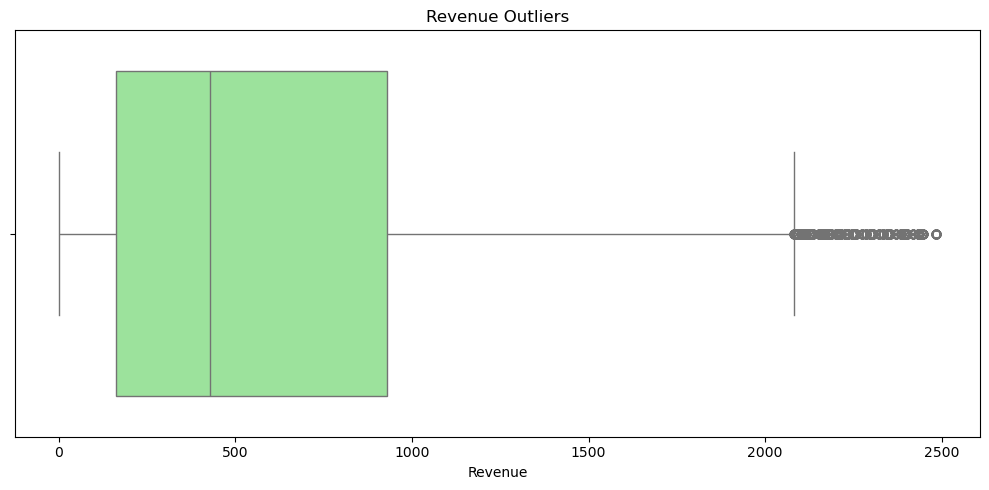

In [54]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Revenue', color='lightgreen')
plt.title('Revenue Outliers')
plt.tight_layout()
plt.show()

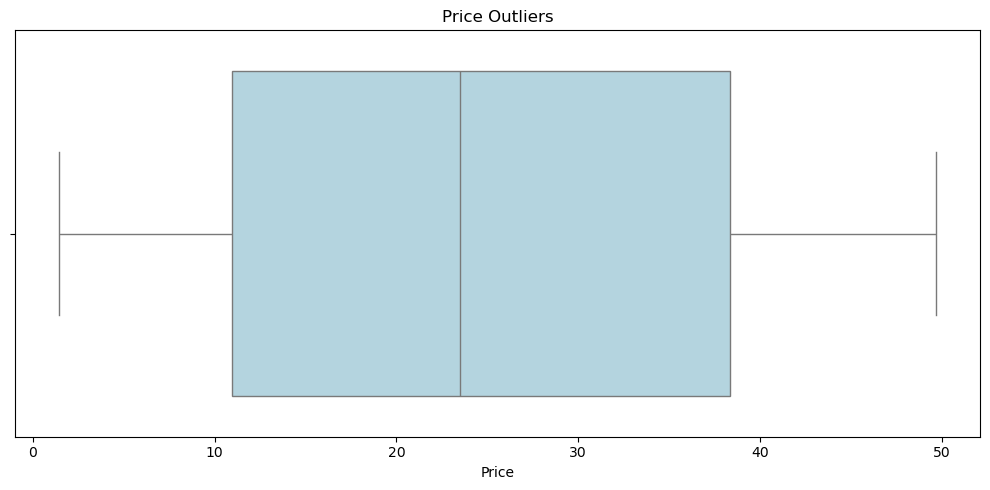

In [55]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Price', color='lightblue')
plt.title('Price Outliers')
plt.tight_layout()
plt.show()

In [56]:
numeric_data = data.select_dtypes(include=['float64','int64'])

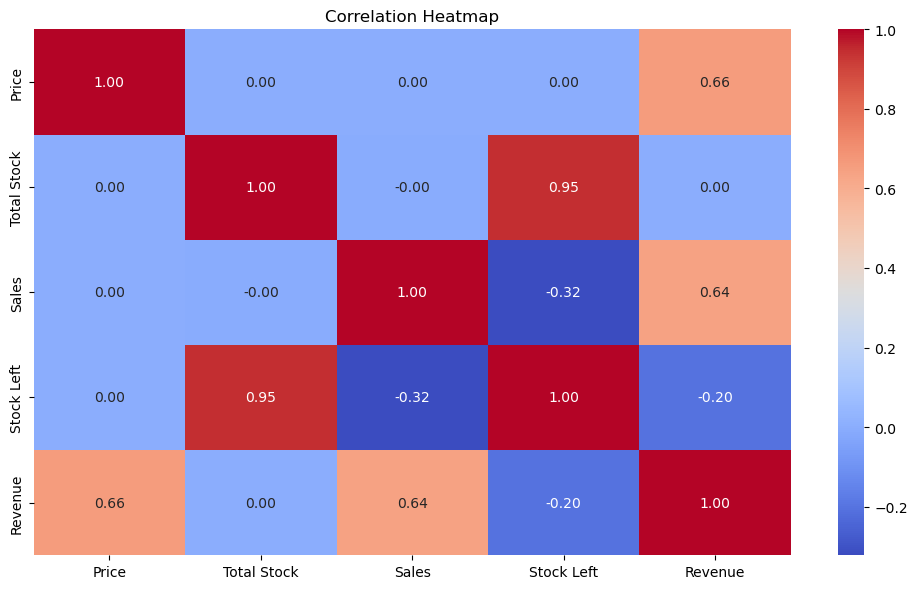

In [57]:
correlation = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [58]:
# Top-20 selling items
data.groupby('Item Name')['Revenue'].sum().sort_values(ascending=False).head(20)

Item Name
Toilet Brush      1383289.92
Vitamins          1372481.44
Phone Case        1351620.36
Shower Curtain    1351205.02
Strawberries      1342968.12
Floss             1327292.70
Vodka             1320563.27
Mugs              1313939.52
Trash Bags        1306688.00
Lime              1304883.84
Extension Cord    1294907.32
Comb              1237329.73
Headphones        1224480.18
Cookware          1170768.94
Perfume           1170083.32
Peas              1164963.87
Bleach            1137718.20
Butter            1123124.73
Cotton Balls      1118811.20
Rum               1093952.04
Name: Revenue, dtype: float64

<Axes: xlabel='Date'>

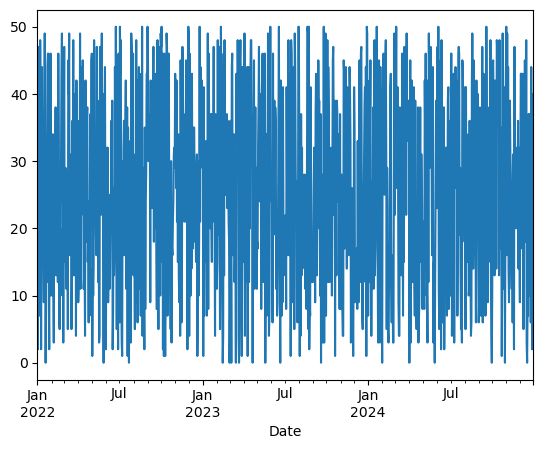

In [59]:
item_sales = data[data['Item Name'] == 'Toilet Brush']
item_sales.groupby('Date')['Sales'].sum().plot()

In [60]:
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


### Most revenue generating month for each year

In [61]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
grouped_monthly = data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

In [62]:
grouped_monthly['Month Name'] = grouped_monthly['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [63]:
# Sort by month
grouped_monthly = grouped_monthly.sort_values(by=['Year', 'Month'])
# grouped_monthly = grouped_monthly.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True))
grouped_monthly[:14]

,Year,Month,Revenue,Month Name
0,2022,1,1928409.19,Jan
1,2022,2,1684004.67,Feb
2,2022,3,1852554.47,Mar
3,2022,4,1844784.30,Apr
4,2022,5,1878652.60,May
5,2022,6,1873574.18,Jun
6,2022,7,1919721.53,Jul
7,2022,8,1852425.62,Aug
8,2022,9,1821962.83,Sep
9,2022,10,1878679.21,Oct


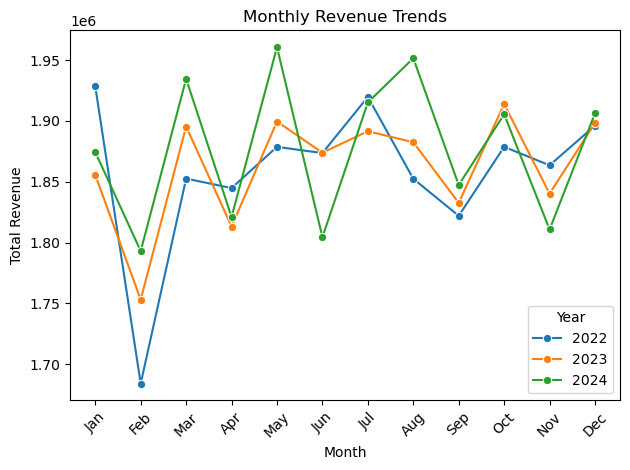

In [64]:
plt.Figure(figsize=(14, 8))
sns.lineplot(data=grouped_monthly, x='Month Name', y='Revenue', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### Identify which item sold most in each month of each year

In [65]:
group_sales = data.groupby(['Year', 'Month', 'Item Name'])['Sales'].sum().reset_index()
group_revenue = data.groupby(['Year', 'Month', 'Item Name'])['Revenue'].sum().reset_index()


In [66]:
# Top 3 selling items and revenue generating items
top_selling_items = group_sales.sort_values(['Year', 'Month', 'Sales'], ascending=[True, True, False]).groupby(['Year', 'Month']).head(3).reset_index(drop=True)
top_revenue_generating_items = group_revenue.sort_values(['Year', 'Month', 'Revenue'], ascending=[True, True, False]).groupby(['Year', 'Month']).head(3).reset_index(drop=True)
top_selling_items

,Year,Month,Item Name,Sales
0,2022,1,Batteries,1556
1,2022,1,Dish Soap,941
2,2022,1,Tequila,925
3,2022,2,Batteries,1583
4,2022,2,Lemon,941
...,...,...,...,...
103,2024,11,Lemon,935
104,2024,11,Strawberries,928
105,2024,12,Batteries,1599
106,2024,12,Vodka,1022


In [67]:
top_revenue_generating_items

,Year,Month,Item Name,Revenue
0,2022,1,Vodka,42894.02
1,2022,1,Toilet Brush,41184.72
2,2022,1,Shower Curtain,40155.40
3,2022,2,Vodka,37121.63
4,2022,2,Mugs,34272.00
...,...,...,...,...
103,2024,11,Floss,43521.00
104,2024,11,Trash Bags,39344.76
105,2024,12,Vodka,47962.46
106,2024,12,Floss,42298.50


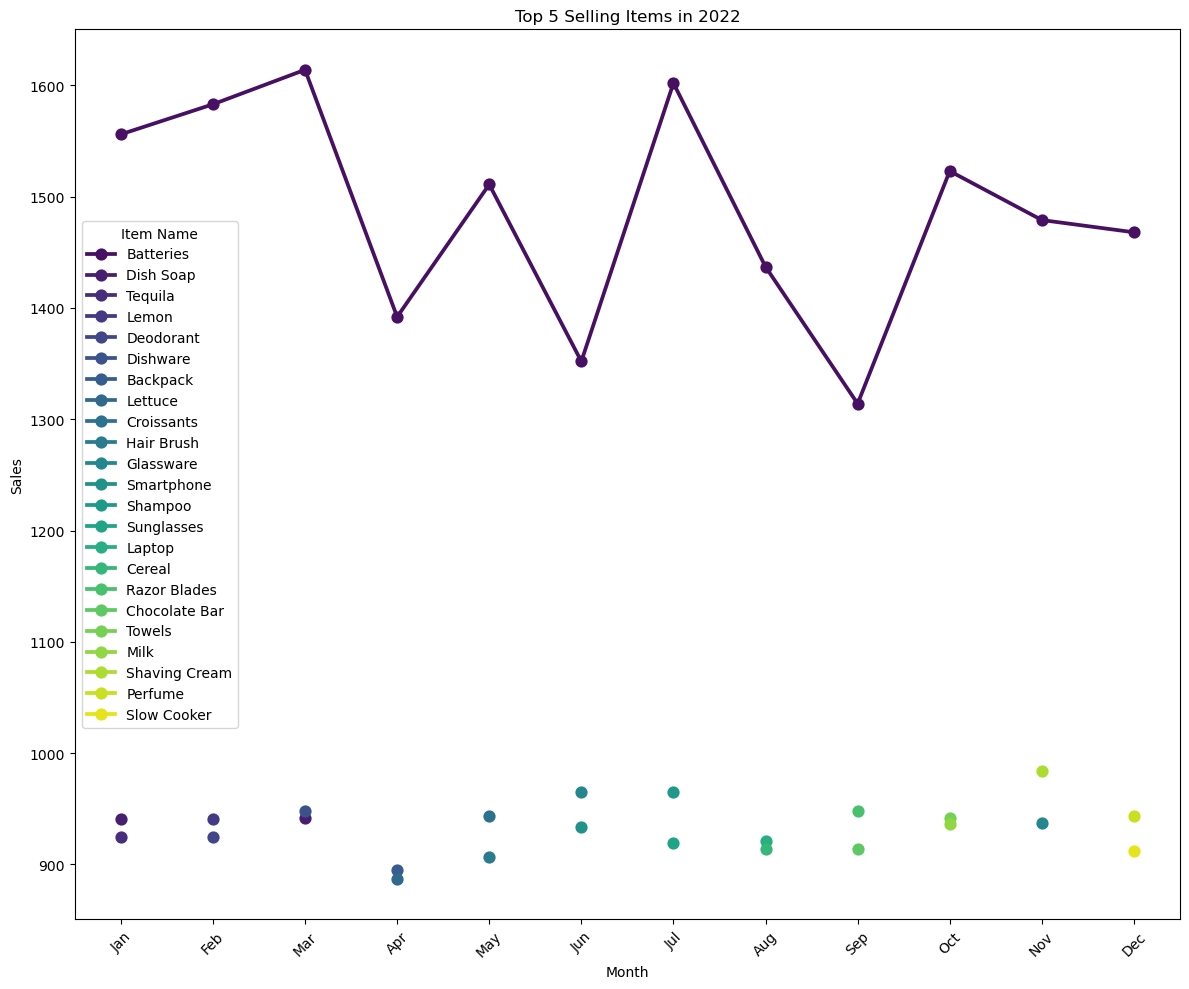

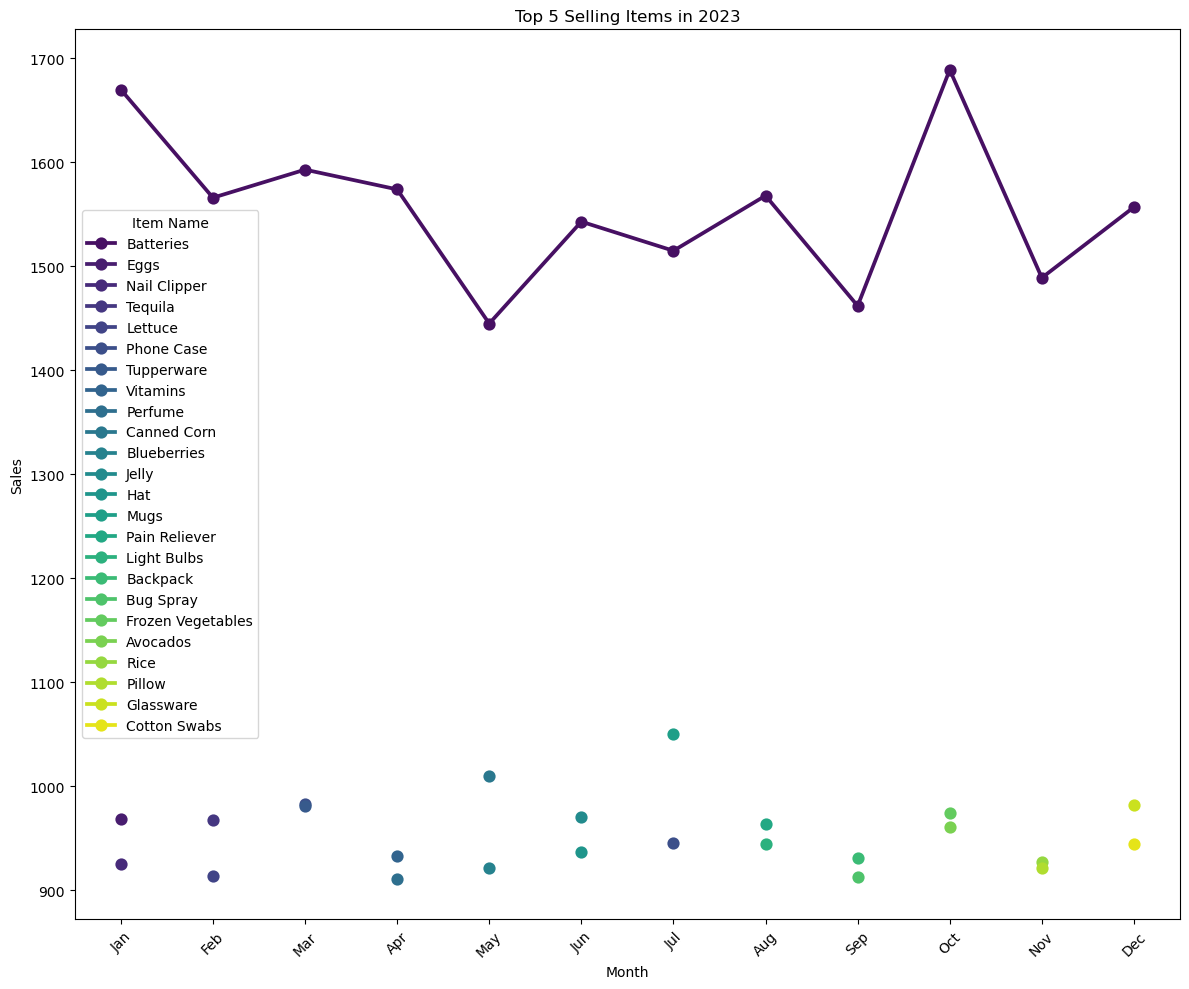

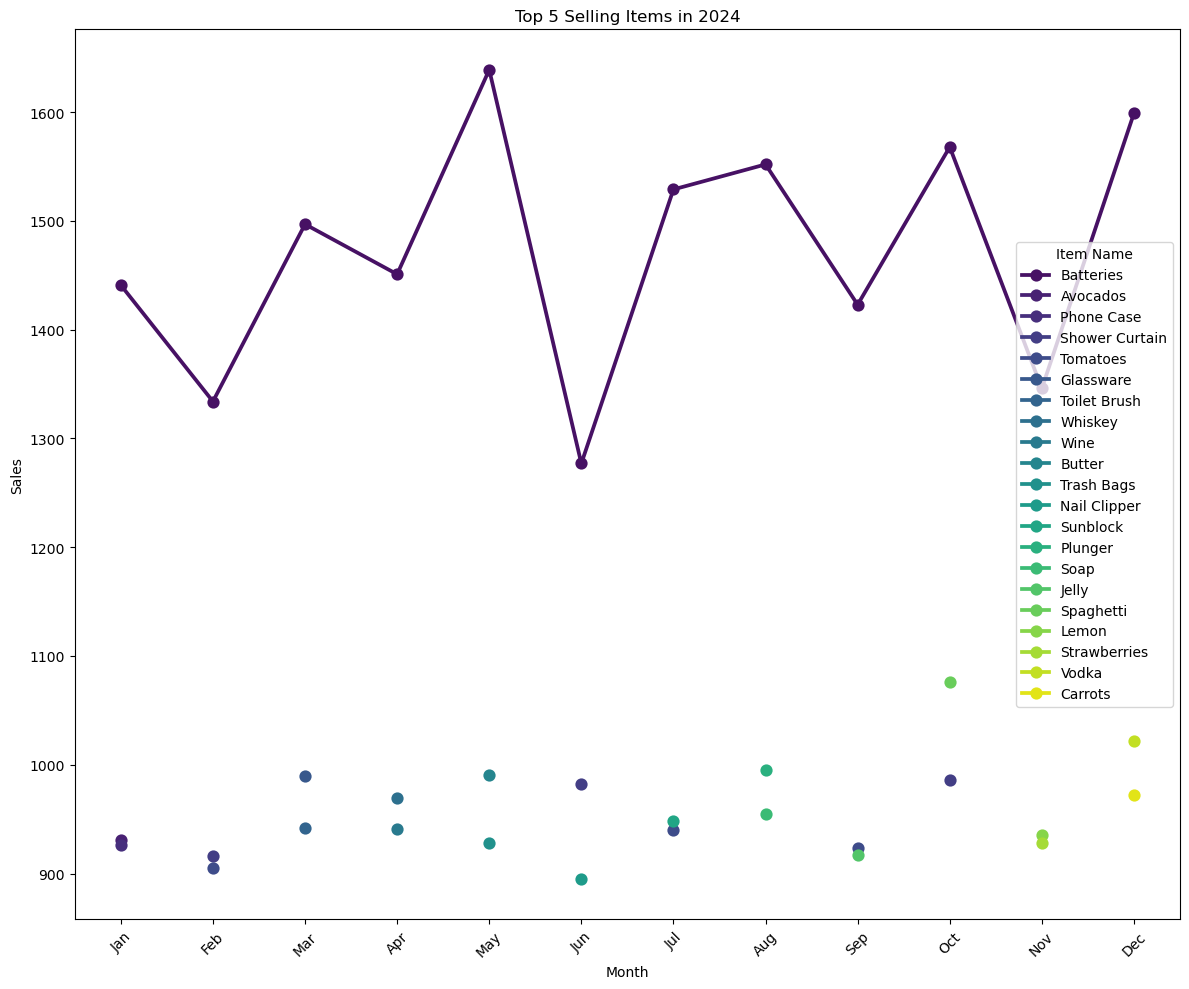

In [68]:
# Get unique years
unique_years = top_selling_items['Year'].unique()

# Set the number of rows and columns for plotting
n_rows = 1  # We will plot one graph per year
n_cols = len(unique_years)  # One column per year

# Create a plot for each year
for year in unique_years:
    # Filter data for the specific year
    data_year = top_selling_items[top_selling_items['Year'] == year]
    
    # Set up the plot for this year
    plt.figure(figsize=(12, 10))
    
    # Create a line plot for the year with markers
    sns.pointplot(data=data_year, x='Month', y='Sales', hue='Item Name', marker='o', palette='viridis')
    
    # Set x-axis labels and rotate
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    
    # Set axis labels and title
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Top 5 Selling Items in {year}')
    
    # Add a legend
    plt.legend(title='Item Name')
    
    # Adjust the layout to make it clear
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [69]:
#install prophet
!pip install statsmodels



In [70]:
from prophet import Prophet

23:02:11 - cmdstanpy - INFO - Chain [1] start processing
23:02:11 - cmdstanpy - INFO - Chain [1] done processing


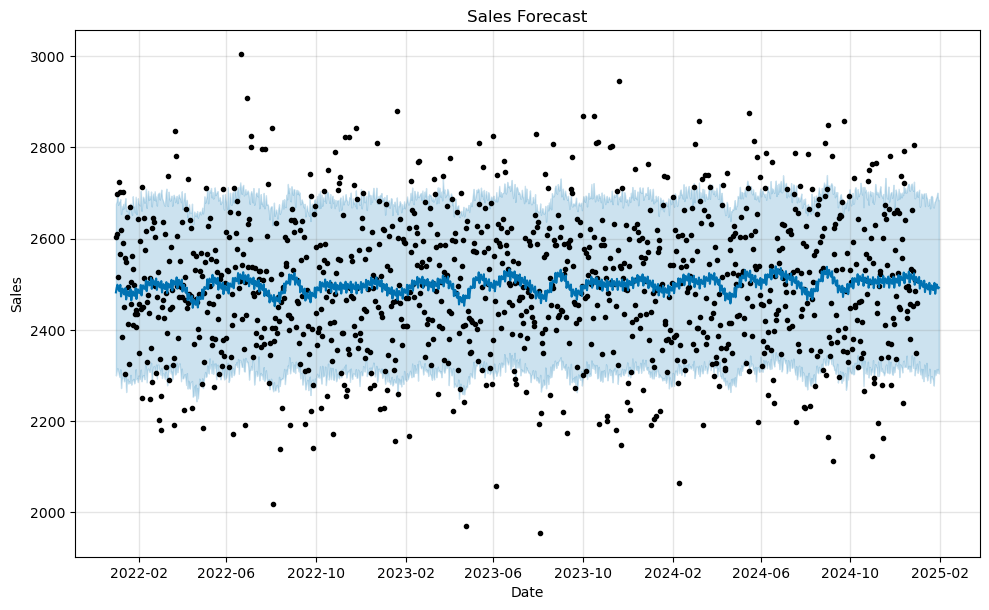

In [71]:
sales_data = data.groupby('Date')['Sales'].sum().reset_index()

# Rename columns for Prophet compatibility
sales_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(sales_data)

# Create a future dataframe for forecasting (e.g., 30 days into the future)
future_dates = prophet_model.make_future_dataframe(periods=30)

# Forecast sales
forecast = prophet_model.predict(future_dates)

# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

ADF Statistic: -32.5469356921276
p-value: 0.0
Time series is stationary.


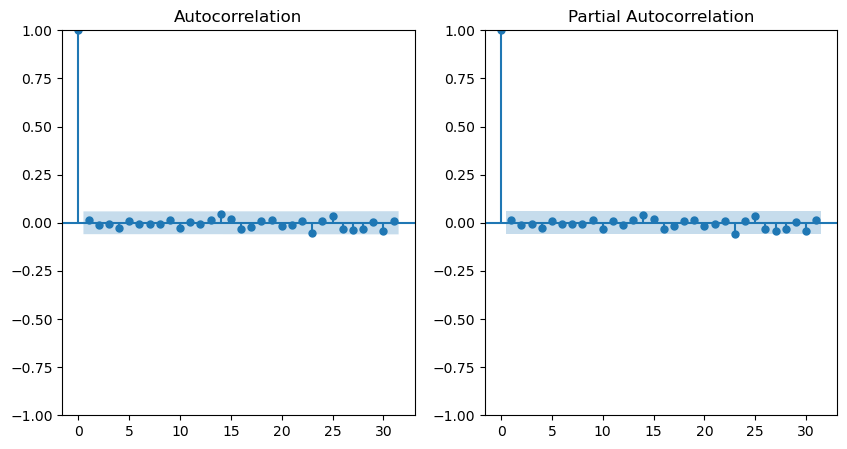

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1096
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -7044.037
Date:                Wed, 22 Jan 2025   AIC                          14092.074
Time:                        23:05:35   BIC                          14102.071
Sample:                    01-01-2022   HQIC                         14095.857
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9986      0.005   -197.953      0.000      -1.008      -0.989
sigma2      2.254e+04    929.001     24.258      0.000    2.07e+04    2.44e+04
Ljung-Box (L1) (Q):                   0.26   Jarque-

/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


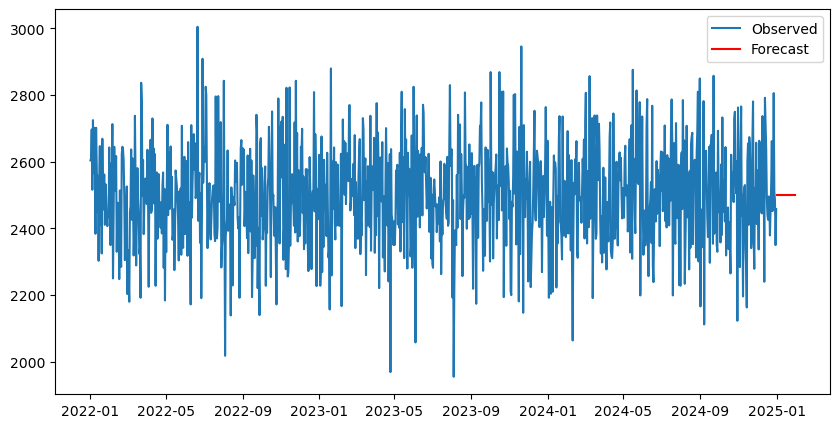

In [74]:
sales_data = data.groupby('Date')['Sales'].sum()

# Step 2: Check for stationarity
result = adfuller(sales_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Time series is not stationary. Differencing will be applied.")
    sales_data_diff = sales_data.diff().dropna()
else:
    print("Time series is stationary.")
    sales_data_diff = sales_data

# Step 3: Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_acf(sales_data_diff, ax=plt.gca())
plt.subplot(122)
plot_pacf(sales_data_diff, ax=plt.gca())
plt.show()

# Step 4: Fit ARIMA Model
model = ARIMA(sales_data, order=(0, 1, 1))  # Adjust (p, d, q) based on ACF/PACF
fitted_model = model.fit()
print(fitted_model.summary())

# Step 5: Forecast
forecast = fitted_model.forecast(steps=30)  # Forecast the next 30 days
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()